
# Diseño de software para cómputo científico

----

## Unidad 1: Paradigma orientado a objetos (OOP)



### Agenda de la Unidad 1
---

- Clase 1:
    - Diferencias entre alto y bajo nivel.
    - Lenguajes dinámicos y estáticos.
    
- Limbo:
    - Introducción al lenguaje Python.
    - Librerías de cómputo científico.
    
- Clase Limbo + 1 y Limbo + 2:
    - **Orientación a objetos**, decoradores.

### Aclaraciónes previas

---

- Existen muchos paradigmas de programación, pero pocos lenguajes que implementan uno solo:
    - Funcional (Haskell)
    - Procedural (ASM, C)
    - Lógico (Prolog)
    - Orientado a objetos (Smalltalk)
- La mayoría de los lenguajes modernos son multiparadigma.
- Pero casi todos los lenguajes se implementan sobre un paradigma en particular.
- Python se implementa sobre OOP.
- La mayoría de los científicos sabe programar en algún lenguaje proceduralmente.   
- Todo de acá en mas esta sacado de Wikipedia y sus links (excepto que diga lo contrario).

### Aclaraciones previas

---

- El OOP no es la verdad de la milanesa.
- Soluciona algunas cosas y fue el gran motor del crecimiento de software desde los '90.

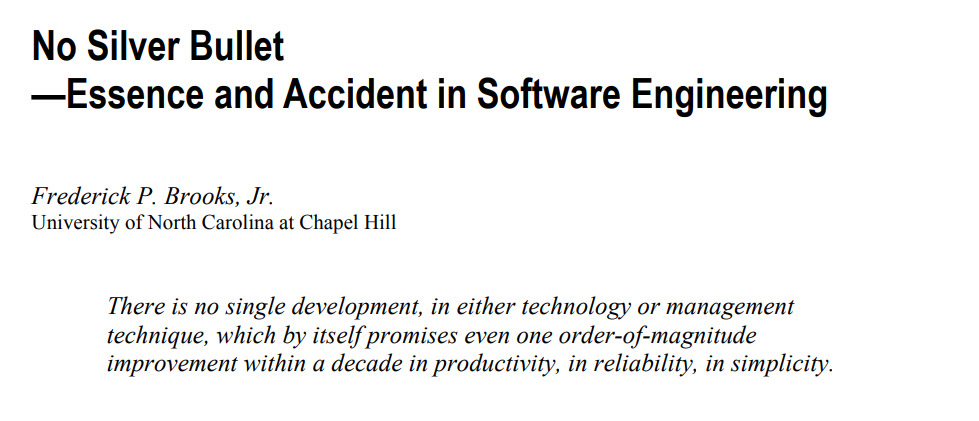

## Vamos con un ejemplo procedural

----

Representemos una persona con un diccionario

In [1]:
persona = {
    "nombre": "tito",
    "sexo": "masculino",
    "edad": 10, 
    "altura": 1.60}

Hagamos un validador de los tipos de persona

In [2]:
def validar_persona(p):
    nombre, sexo = p.get("nombre"), p.get("sexo")
    edad, altura = p.get("edad"), p.get("altura")
    return (
        type(nombre) == str and nombre and
        sexo in ("masculino", "femenino") and
        type(edad) == int and (0 < edad < 120) and
        type(altura) == float and (.2 <= altura <= 2.30))
        
validar_persona(persona)

True

### Pero tu jefe te cambia los requerimientos
---

```python
def validar_persona(p):
    nombre, genero = p.get("nombre"), p.get("género")
    edad, altura = p.get("edad"), p.get("altura")
    return (
        type(nombre) == str and nombre and
        genero in ("varón", "mujer") and
        type(edad) == int and (0 < edad < 120) and
        type(altura) == float and (.2 <= altura <= 2.30))
```

<small>Siglo XXI, quiero que soportes 70 generos como facebook.</small>

<small>Quiero trabajar internacionalmente</small>

<small>Solo operamos a mayores de edad segun el pais.</small>

<small>Las medidas de altura son en centímetros.<small>

### Cuál es el problema?
----------

- Los requerimientos cambian.
- Los programas representan normalmente abstracciones de algún problema.
- El acoplamiento es un problema semántico y no sintáctico.

> el **acoplamiento** es la forma y nivel de interdependencia entre módulos de software; una medida de qué tan cercanamente conectados están dos rutinas o módulos de software; así como el grado de fuerza de la relación entre módulos.
>  
> El acoplamiento está comúnmente contrastado con la **cohesión**. Un bajo acoplamiento normalmente se 
> correlaciona con una alta cohesión. El bajo acoplamiento es una señal de un sistema con un buen diseño.

### Soluciones
----

Este es el problema que suele solucionar el OOP.

¿alguna idea? (Piensen out of the box)

- Volvamos al acoplamiento mas evidente.
- Hagámoslo explícito.

## POO
---

Vamos de a poco formalizando (En el sentido ingenieril de la palabra)

**Estos datos, guardan algún estado que representan a la persona**

```python
persona = {
    "nombre": "tito", "sexo": "masculino",
    "edad": 10, "altura": 1.60}
```
    
**Esto es "lógica", representan algún tipo de comportamiento que se puede hacer al manipular los datos**

```python
def validar_persona(p):
    nombre, sexo = p.get("nombre"), p.get("sexo")
    edad, altura = p.get("edad"), p.get("altura")
    return (...)
```

**Tanto los datos como la lógica se guardan cada una en un lugar único de memoria que se accede por su nombre**

In [3]:
hex(id(persona)), hex(id(validar_persona))

('0x7f7cd450e340', '0x7f7cd4519e50')

### POO - Definición formal
----

Un objeto es algo que tiene

- Estado
- Comportamiento
- Identitad

```ipython
>>> p0 = Persona(nombre="tito", sexo= "masculino", edad=10, altura=1.6)
>>> p0.nombre, p0.validar()
("tito", True)
>>> p1 = Persona(nombre="tito", sexo= "masculino", edad=10, altura=1.6)
>>> p1.nombre, p1.validar()
("tito", True)
>>> hex(id(p0)), hex(id(p1))
('0x7f61680be120', '0x7f6168044b85')
```

### POO - Clases
----

- Se pueden implementar objetos de varias formas. 
- Python implementa objetos con **clases** (`class`).
- Una clase es un **blue-print** (plano) de objetos similares.
- Las clases **instancian** (crean) objetos.
- En Python las clases son objetos (de hecho **TODO** es un objeto en Python).

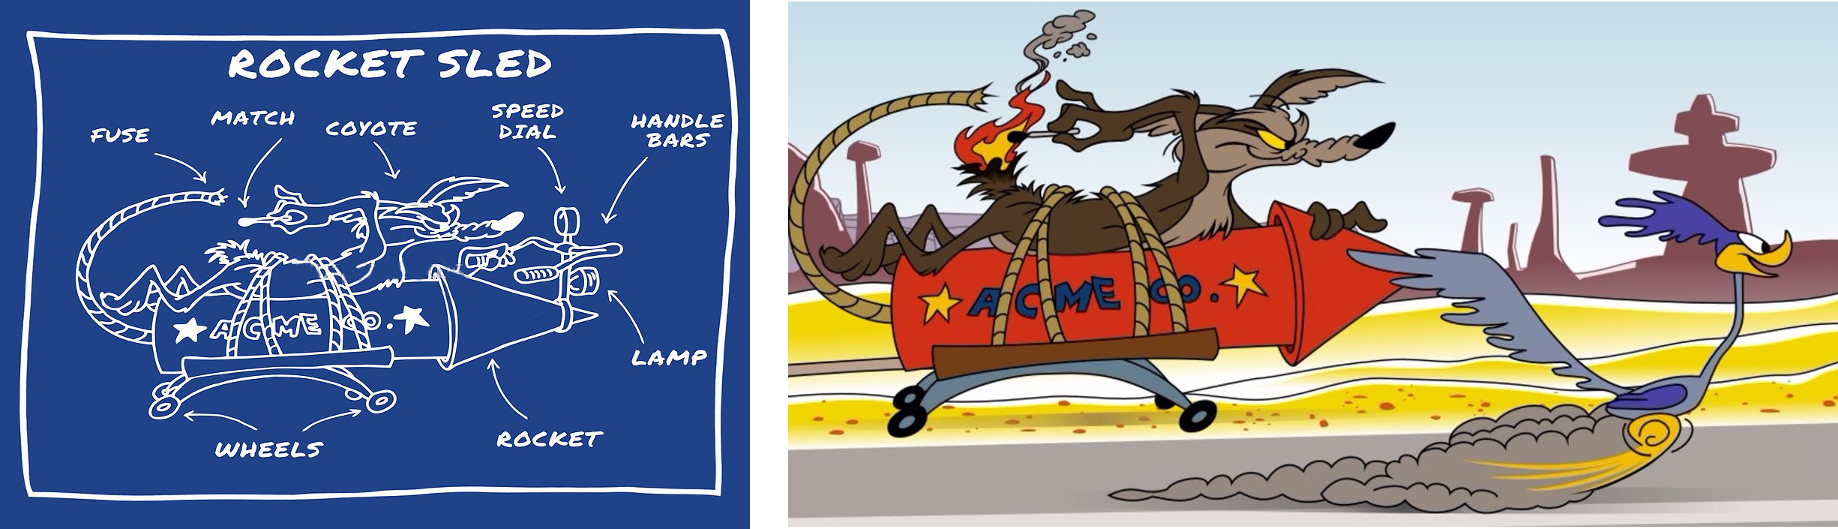

POO - Clases - Estado e identidad
----

In [4]:
class Persona:
    def __init__(self, nombre, sexo, edad, altura):
        self.nombre = nombre
        self.sexo = sexo
        self.edad = edad
        self.altura = altura

In [5]:
Persona("tito", "masculino", 10, 1.60), Persona("tito", "masculino", 10, 1.60)

(<__main__.Persona at 0x7f7cd451b100>, <__main__.Persona at 0x7f7cd451beb0>)

### POO - Clases - Comportamiento

In [6]:
class Persona:
    def __init__(self, nombre, sexo, edad, altura):
        self.nombre = nombre
        self.sexo = sexo
        self.edad = edad
        self.altura = altura
        
    def validar(self):
        return (
            type(self.nombre) == str and self.nombre and
            self.sexo in ("masculino", "femenino") and
            type(self.edad) == int and (0 < self.edad < 120) and
            type(self.altura) == float and (.2 <= self.altura <= 2.30))

p = Persona("tito", "masculino", 10, 1.60)
p.validar()

True

### POO - Clases - Mejorando

la funcion `isinstance(obj, clase)` verifica si un objeto es de una clase dada

In [7]:
class Persona:
    def __init__(self, nombre, sexo, edad, altura):
        self.nombre = nombre
        self.sexo = sexo
        self.edad = edad
        self.altura = altura
        
    def validar(self):
        return (
            isinstance(self.nombre, str) and self.nombre and
            self.sexo in ("masculino", "femenino") and
            isinstance(self.edad, int) and (0 < self.edad < 120) and
            isinstance(self.altura, float) and (.2 <= self.altura <= 2.30))

p = Persona("tito", "masculino", 10, 1.60)
p.validar()

True

## POO - Propiedades
---

- Encapsulamiento.
- Herencia.
- Polimorfismo.

### POO - Propiedades - *Encapsulamiento*

---

Se refiere a dos conceptos separados, y en algunos casos a los dos al mismo tiempo:

- La capacidad del lenguaje para mezclar datos y métodos que operan sobre estos datos.
- Un mecanismo del lenguaje para restringir la modificación de los componentes del objeto.

Cada objeto está aislado del exterior, es un módulo natural, y la aplicación entera se reduce a un agregado o rompecabezas de objetos. El aislamiento protege a los datos asociados de un objeto contra su modificación por quien no tenga derecho a acceder a ellos, eliminando efectos secundarios e interacciones.

### POO - Propiedades - *Encapsulamiento*

---

```java
import org.apache.commons.text.WordUtils;

public class Persona {
    private String nombre;
    
    public Persona(int nombre){
        this.nombre = WordUtils.capitalizeFully(nombre);
    }
    
    public String getNombre(){
        return this.nombre;
    }
    
    public void setNombre(String nombre){
        this.nombre = WordUtils.capitalizeFully(nombre);
    }
}
```

### POO - Propiedades - *Encapsulamiento*

---

**Esto no anda**
```java
Persona p = new Persona("tito");
p.nombre = "toto";
p.nombre;
```

**Esto si anda**

```java
Persona p = new Persona("tito");
p.setNombre("toto carloto");
p.getNombre(); // Toto Carloto
```

### POO - Propiedades - *Encapsulamiento*

---

- Python no tiene nada parecido a lo que tiene Java/C++/C#
- En remplazo tenemos algunos _name mangling_ y **propiedades**

Las cosas privadas empiezan con un under_score (pero nunca empiezan y terminan con 2)

In [8]:
class Persona:
    def __init__(self, nombre):
        self.__nombre = nombre.title() # esto se considera privado
        
    @property
    def nombre(self):
        return self.__nombre
        
    @nombre.setter
    def nombre(self, nombre):
         self.__nombre = nombre.title()

### POO - Propiedades - *Encapsulamiento*

---

In [9]:
p = Persona("tito")
p.nombre = "toto carloto"
p.nombre

'Toto Carloto'

In [10]:
p.__nombre

AttributeError: 'Persona' object has no attribute '__nombre'

In [11]:
print(dir(p))

['_Persona__nombre', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'nombre']


### POO - Propiedades - *Encapsulamiento*

---

En la práctica suele usarse 1 _under-score_, para que si alguien quiera usar estos atributos privados, los haga bajo su propio riesgo

In [12]:
class Persona:
    def __init__(self, nombre):
        self._nombre = nombre.title() # esto se considera privado
        
    @property
    def nombre(self):
        return self._nombre
        
    @nombre.setter
    def nombre(self, nombre):
         self._nombre = nombre.title()

In [13]:
p = Persona("tito")
p.nombre = "toto carloto"
print(p.nombre)

p._nombre = "coso"
print(p.nombre)

Toto Carloto
coso


### POO - Propiedades - Herencia
----



- En la programación orientada a objetos, la herencia es el mecanismo de basar un objeto **o** clase en otro objeto (herencia basada en prototipo) u otra clase (herencia basada en clase), reteniendo una implementación similar. 
- También se define como derivar nuevas clases (subclases) de las existentes (súper clase o clase base) y formarlas en una jerarquía de clases.
- En Python la herencia es **explícita** o **implícita**, pero obligatoria:

In [14]:
class Foo(object): 
    pass

class Foo: 
    pass

### POO - Propiedades - Herencia

#### Clases abstractas. 
----

Quiero modelar estos dos animales mamiferos

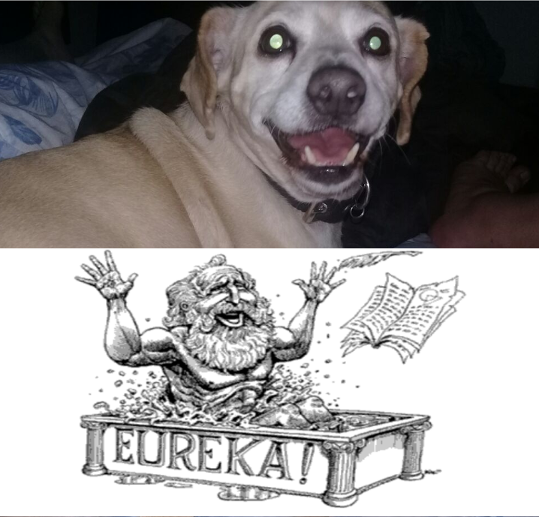

### POO - Propiedades - Herencia
----------

In [15]:
class Animal:
    def __init__(self, nombre):
        self._nombre = nombre
        self._vivo = True

    @property
    def nombre(self):
        return self._nombre.title()
    
    def vivir(self):
        return "viviendo" if self._vivo else "estoy muerto"    
    def morirse(self):
        self._vivo = False

class Mamifero(Animal):
    def lactar(self):
        return "lactando"
    def nacer(self):
        return "de una hembra"
    
class Perro(Mamifero): 
    def ladrar(self): 
        return "guau"
    
class Humano(Mamifero): 
    def saludar(self):
        return "hola"

### POO - Propiedades - Herencia
----

In [16]:
arqui_p = Perro("Arquimedes")
arqui_h = Humano("Arquimedes")
type(arqui_p), type(arqui_h)

(__main__.Perro, __main__.Humano)

In [17]:
arqui_p.ladrar(), arqui_p.saludar()

AttributeError: 'Perro' object has no attribute 'saludar'

In [18]:
arqui_p.nombre, arqui_h.nombre

('Arquimedes', 'Arquimedes')

In [19]:
arqui_p.lactar(), arqui_h.lactar()

('lactando', 'lactando')

In [20]:
isinstance(arqui_p, Animal), isinstance(arqui_h, Perro)

(True, False)

In [21]:
arqui_h.vivir(), arqui_h.morirse(), arqui_h.vivir()

('viviendo', None, 'estoy muerto')

### POO - Propiedades - Herencia
#### Empezamos con los problemas
----------
Estabamos asi: 
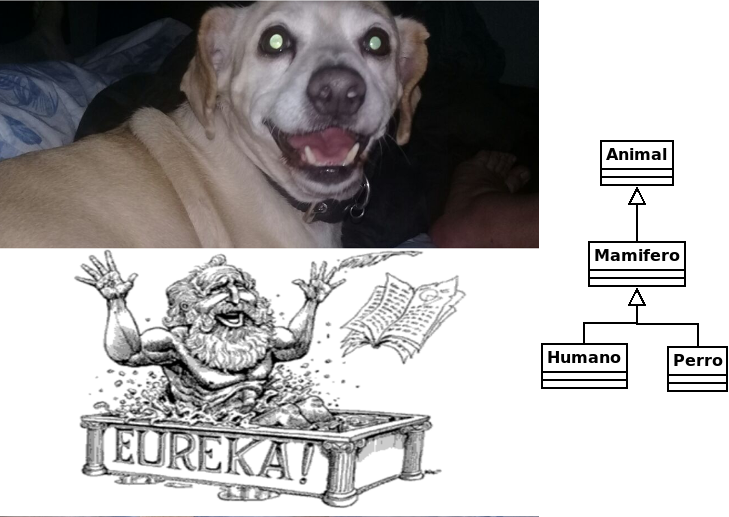

### POO - Propiedades - Herencia
#### Empezamos con los problemas
----------
<small>Pero los requerimientos cambian<small>

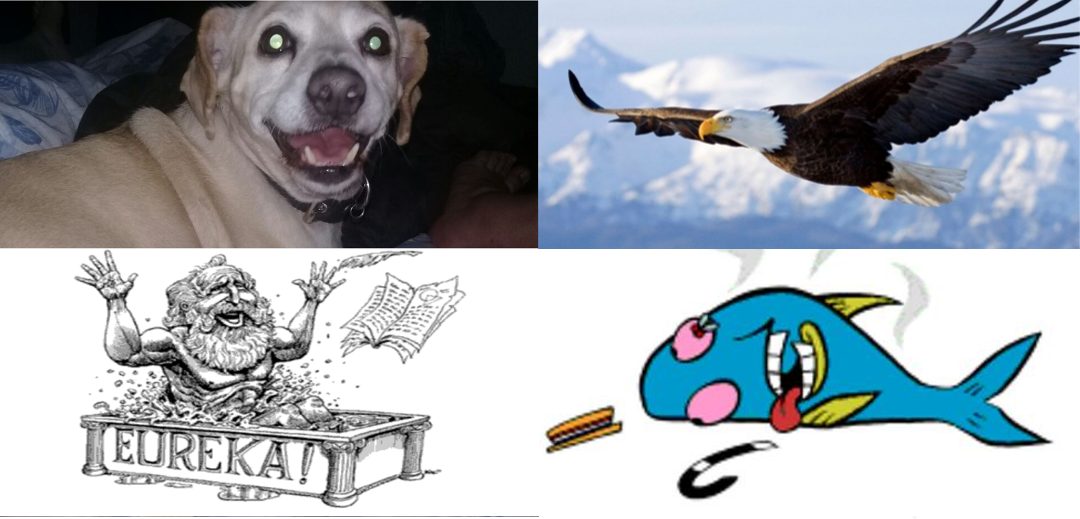

### POO - Propiedades - Herencia
#### Empezamos con los problemas
----------

In [22]:
class Oviparo(Animal): 
    def nacer(self):
        return "de un huevo"

class Ave(Oviparo): pass

class Pez(Oviparo): pass

rupert = Pez("Rupert")
freedom = Ave("Freedom")    

In [23]:
isinstance(rupert, Animal), isinstance(freedom, Mamifero), isinstance(rupert, (Ave, Oviparo))

(True, False, True)

In [24]:
issubclass(Ave, Oviparo)

True

### POO - Propiedades - Herencia
#### Empezamos con los problemas
----------

Ahora pasamos a esto

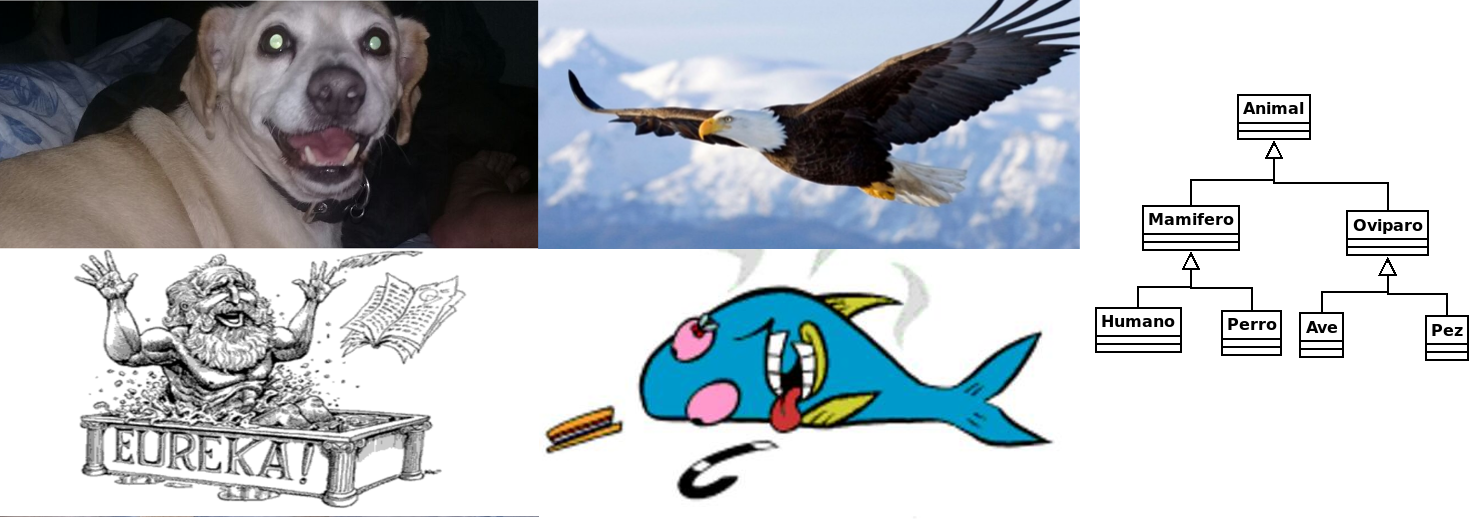

### POO - Propiedades - Herencia
#### Empezamos con los problemas
----------
Peero la realidad es complicada

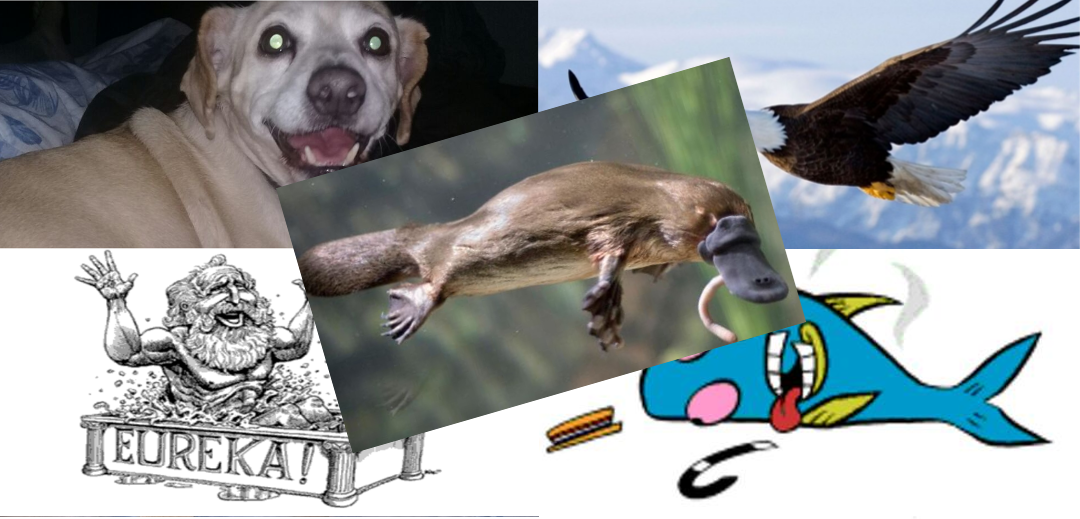

### POO - Propiedades - Herencia
#### Herencia múltiple
----------

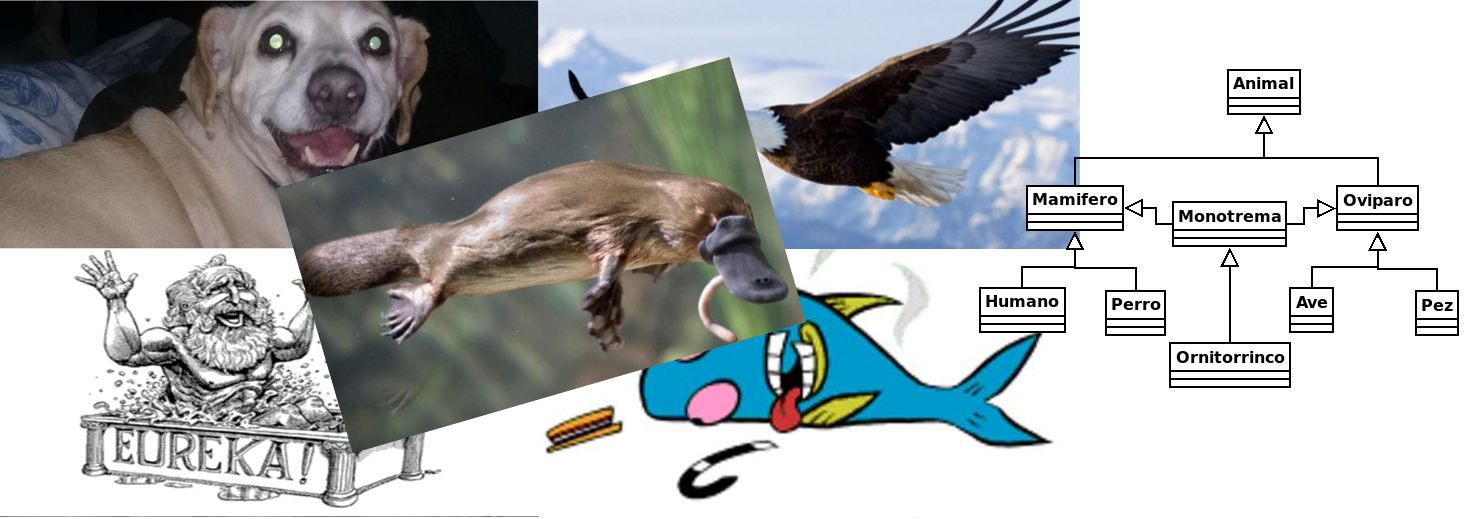

### POO - Propiedades - Herencia
#### Herencia múltiple
----------

In [25]:
class Monotrema(Mamifero, Oviparo):
    pass

class Ornitorrinco(Monotrema):
    pass

In [26]:
orni = Ornitorrinco("ornitorrinco")
orni.nacer(), orni.lactar()

('de una hembra', 'lactando')

### POO - Propiedades - Herencia
#### Herencia múltiple, problemas
----------

In [27]:
class Monotrema(Oviparo, Mamifero):
    pass

class Ornitorrinco(Monotrema):
    pass

orni = Ornitorrinco("ornitorrinco")
orni.nacer(), orni.lactar()

('de un huevo', 'lactando')

In [28]:
Ornitorrinco.__mro__

(__main__.Ornitorrinco,
 __main__.Monotrema,
 __main__.Oviparo,
 __main__.Mamifero,
 __main__.Animal,
 object)

### POO - Cerrando Herencia Multiple

----

- Los detractores señalan que hay problemas de implementación de la herencia múltiple.
- Hay lenguajes que solucionan todos los problemas técnicos de la herencia múltiple, pero el debate principal sigue sobre si implementar y usar herencia múltiple es más fácil que usar herencia simple.
- Java, Nemerle, Delphi, C# y Objective-C no permiten herencia múltiple, pero tienen otros mecanismos para simularla.
- Para evitar estos problemas existe un patron llamado **Mixin**.

### POO - Cerrando Herencia Multiple - Mixins

----

- Un mixin es una clase que ofrece cierta funcionalidad para ser heredada por una subclase, pero no está ideada para ser autónoma. 
- Heredar de un mixin no es una forma de especialización sino más bien un medio de obtener funcionalidad. 
- Una subclase puede incluso escoger heredar gran parte o el total de su funcionalidad heredando de uno o más mixins mediante herencia múltiple.
- En cristiano: **un mixin tiene comportamiento pero no estado**

### POO - Cerrando Herencia Multiple - Mixins

----

En nuesto caso

In [29]:
class LactarMixin:
    def lactar(self):
        return "lactando"
    
class NacerDeHuevoMixin:
    def nacer(self):
        return "de huevo"
    
class NacerDeHembraMixin:
    def nacer(self):
        return "de hembra"


class Mamifero(LactarMixin, NacerDeHembraMixin, Animal): pass
class Oviparo(NacerDeHuevoMixin, Animal): pass
class Monotrema(LactarMixin, NacerDeHuevoMixin, Animal): pass

#### POO - Polimorfismo
----

- El polimorfismo se refiere a la propiedad por la que es posible enviar mensajes sintácticamente iguales a objetos de tipos distintos. 
- El único requisito que deben cumplir los objetos que se utilizan de manera polimórfica es saber responder al mensaje que se les envía.

In [30]:
for obj in [arqui_p, arqui_h, rupert, freedom, orni]:
    print(type(obj), obj.vivir())

<class '__main__.Perro'> viviendo
<class '__main__.Humano'> estoy muerto
<class '__main__.Pez'> viviendo
<class '__main__.Ave'> viviendo
<class '__main__.Ornitorrinco'> viviendo
